In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import csv
import os

energy

In [7]:
headers = ['duration_seconds', 'cpu0_package_joules', 'cpu0_dram_joules', 'cpu1_package_joules', 'cpu1_dram_joules', 'schema', 'video']
data = []

for dir in os.listdir("energy"):
    # For each subfolder in Energy folder (1Mb.JPEG)
        dir_path = os.path.join("energy", dir)
        schema = dir

        for file in os.listdir(dir_path):
            # For each file in the subfolder (pillow1Mb.JPEG.txt)
            file_paht = os.path.join(dir_path, file)
            video = file.replace(".txt", "")

            with open(file_paht, 'r') as file:
                lines = file.readlines()
            
            for line in lines:
                line = line.strip()
                if line.startswith('duration_seconds'):
                    duration_seconds = line.split('=')[1]
                elif line.startswith('cpu0_package_joules'):
                    cpu0_package_joules = line.split('=')[1]
                elif line.startswith('cpu0_dram_joules'):
                    cpu0_dram_joules = line.split('=')[1]
                elif line.startswith('cpu1_package_joules'):
                    cpu1_package_joules = line.split('=')[1]
                elif line.startswith('cpu1_dram_joules'):
                    cpu1_dram_joules = line.split('=')[1]

                    # Append the extracted values to the data list
                    data.append([duration_seconds, 
                                cpu0_package_joules, 
                                cpu0_dram_joules, 
                                cpu1_package_joules, 
                                cpu1_dram_joules, 
                                schema, 
                                video])

with open("energy.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write the header
        writer.writerows(data)    # Write the data

df = pd.read_csv("energy.csv")
df["energy"] = df["cpu0_package_joules"] + df["cpu1_package_joules"]
# Replace commas with dots in 'mean_energys' column
# df['mean_energys'] = df['mean_energys'].str.replace(',', '.')

# Convert to float
# df['mean_energys'] = pd.to_numeric(df['mean_energys'], errors='coerce')
 
df.head()

,duration_seconds,cpu0_package_joules,cpu0_dram_joules,cpu1_package_joules,cpu1_dram_joules,schema,video,energy
0,21.281621,2421.583557,298.231578,2234.881226,269.772859,S3,daenerys.mp4,4656.464783
1,20.854190,2367.737061,292.624985,2209.419495,264.449377,S3,daenerys.mp4,4577.156556
2,20.864289,2395.345276,294.386657,2197.967346,263.806165,S3,daenerys.mp4,4593.312622
3,22.154182,2527.257935,312.337734,2321.686829,276.624551,S3,daenerys.mp4,4848.944764
4,20.778481,2388.750427,293.443673,2184.334473,261.376938,S3,daenerys.mp4,4573.084900


In [8]:


schema_order = ["S1", "S2", "S3", "S4", "S5" , "S6"]

bar_width = 0.12

def max_abs_scale(series):
    return series / series.abs().max()

dftt = df.copy()

mean_df = dftt.groupby(['schema'], as_index=False)['energy'].mean()
mean_df.rename(columns={'energy': 'mean_cpu0_package_joules'}, inplace=True)
std_df = dftt.groupby(['schema'], as_index=False)['energy'].std()
std_df.rename(columns={'energy': 'std_cpu0_package_joules'}, inplace=True)

dftt = std_df.merge(mean_df, on=['schema'])
dfe_max_abs = dftt.copy()
dfe_max_abs['mean_cpu0_package_joules'] = dfe_max_abs['mean_cpu0_package_joules'].transform(max_abs_scale).round(2)
dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)
dfe_max_abs = dfe_max_abs.sort_values(['schema'])

# dfe_max_abs

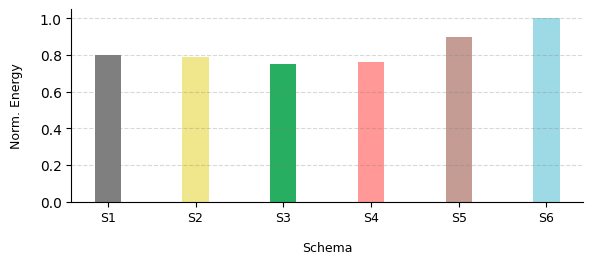

In [9]:
color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5",
]

fig, ax = plt.subplots(figsize=(6.6, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6"]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['mean_cpu0_package_joules'], color=color_mapping, width=0.30)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Energy', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()

In [10]:
df = pd.read_csv("result.csv")

def max_abs_scale(series):
    return series / series.abs().max()

In [11]:
df.head()

,chunkdir,schema,expe,video,process,pull,push
0,chunk.8,S6,1,daenerys.mp4,6.838473,0.141617,1.470938
1,chunk.4,S6,1,daenerys.mp4,11.264445,0.139356,2.811273
2,chunk.0,S6,1,daenerys.mp4,11.145189,0.160248,2.229956
3,chunk.2,S6,1,daenerys.mp4,13.002515,0.151691,2.783417
4,chunk.7,S6,1,daenerys.mp4,13.253448,0.162364,2.841647


In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy.groupby(['schema', 'expe'], as_index=False)[['process', 'pull', 'push']].sum()

In [9]:
df_copy

,schema,expe,process,pull,push
0,S1,1,112.904687,2.113479,28.467169
1,S1,2,112.916181,2.046784,31.835655
2,S1,3,113.308830,2.231904,20.333078
3,S1,4,113.060666,1.810596,27.374983
4,S1,5,113.226614,2.100322,23.216486
...,...,...,...,...,...
175,S6,26,156.754471,1.561273,34.728970
176,S6,27,156.555544,2.074202,29.459747
177,S6,28,157.059766,1.731164,29.249089
178,S6,29,156.437674,1.549783,28.019561


In [14]:
df_copy = df_copy.groupby(['schema'], as_index=False)[['process', 'pull', 'push']].mean()

In [15]:
df_copy["PullAndPush"] = df_copy["pull"] + df_copy["push"]
df_copy["total"] = df_copy["PullAndPush"] + df_copy["process"]

df_copy

,schema,process,pull,push,PullAndPush,total
0,S1,113.103561,2.160204,29.543092,31.703296,144.806857
1,S2,133.413605,1.364845,23.962726,25.327571,158.741175
2,S3,111.390143,2.136630,24.876481,27.013111,138.403254
3,S4,131.470829,1.388724,21.110087,22.498811,153.969640
4,S5,136.906868,2.417345,33.925672,36.343017,173.249885
5,S6,156.911332,1.727490,28.737318,30.464808,187.376140


In [16]:
 
dfe_max_abs = df_copy.copy()

dfe_max_abs['totalNorm'] = dfe_max_abs['total'].transform(max_abs_scale).round(2)

dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)

dfe_max_abs = dfe_max_abs.sort_values(['schema'])

dfe_max_abs

,schema,process,pull,push,PullAndPush,total,totalNorm
0,S1,113.103561,2.160204,29.543092,31.703296,144.806857,0.77
1,S2,133.413605,1.364845,23.962726,25.327571,158.741175,0.85
2,S3,111.390143,2.136630,24.876481,27.013111,138.403254,0.74
3,S4,131.470829,1.388724,21.110087,22.498811,153.969640,0.82
4,S5,136.906868,2.417345,33.925672,36.343017,173.249885,0.92
5,S6,156.911332,1.727490,28.737318,30.464808,187.376140,1.00


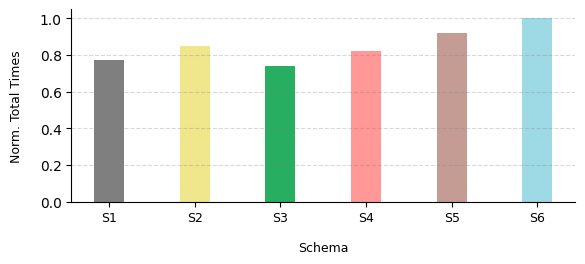

In [17]:

color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5",
     
]

fig, ax = plt.subplots(figsize=(6.5, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6" ]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['totalNorm'], color=color_mapping, width=0.35)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Total Times', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()

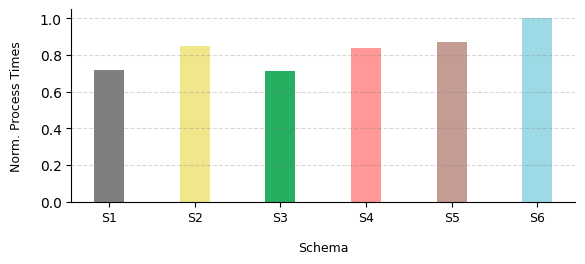

In [ ]:
 
dfe_max_abs = df_copy.copy()

dfe_max_abs['ProcessNorm'] = dfe_max_abs['process'].transform(max_abs_scale).round(2)

dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)

dfe_max_abs = dfe_max_abs.sort_values(['schema'])

dfe_max_abs

color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5"
]

fig, ax = plt.subplots(figsize=(6.5, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6" ]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['ProcessNorm'], color=color_mapping, width=0.35)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Process Times', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()